In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

In [71]:
def data_from_json(name):
    data = []
    #Each line in the json is an evolutionary run
    with open(name, 'r') as fp:
        for levels_json in fp:
            if levels_json != "\n":
                di = json.loads(levels_json)
                data.append(di)
    return data

In [72]:
def extract_best_result(data):
    best_results = []
    #First we extract the best results of each run
    for i in range(len(data)):
        best_results += [data[i]["best_fitness"][-1][2]]
    best_result = data[np.argmin(np.array(best_results))]
    return best_result

In [73]:
data_sphere = data_from_json('sphere_analytics.json')
data_schaffer = data_from_json('schaffer_analytics.json')

In [74]:
#We obtain the run which had the best result
best_result_sphere = extract_best_result(data_sphere)
best_result_schaffer = extract_best_result(data_schaffer)

In [75]:
def plot_avg_fitness(best_result, name):
    t = np.arange(len(best_result["average_fitness"]))

    fig, ax = plt.subplots()
    ax.plot(t, best_result["average_fitness"])

    ax.set(xlabel='Generation', ylabel='Average fitness')
    ax.grid()

    fig.savefig(name)
    plt.show()
    
def plot_best_fitness(best_result, name):
    t = np.arange(len(best_result["best_fitness"]))

    fig, ax = plt.subplots()
    ax.plot(t, [r[2] for r in best_result["best_fitness"]])

    ax.set(xlabel='Generation', ylabel='Best fitness')
    ax.grid()

    fig.savefig(name)
    plt.show()

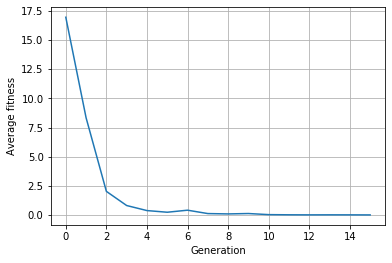

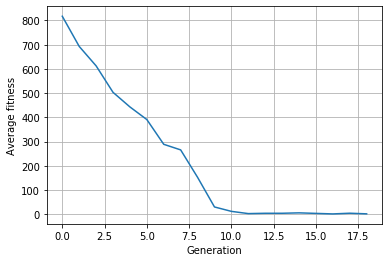

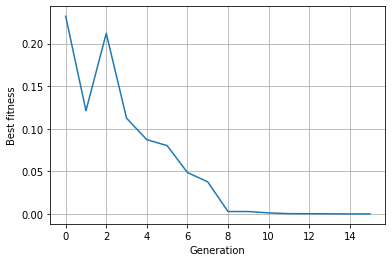

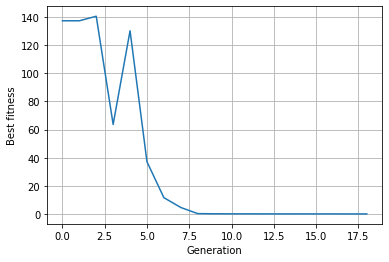

In [76]:
plot_avg_fitness(best_result_sphere, "sphere_fitness_v_gens_avg.png")
plot_avg_fitness(best_result_schaffer, "schaffer_fitness_v_gens_avg.png")
plot_best_fitness(best_result_sphere, "sphere_fitness_v_gens.png")
plot_best_fitness(best_result_schaffer, "schaffer_fitness_v_gens.png")

In [78]:
#Best solution for sphere function
print(best_result_sphere["best_fitness"][-1])
#Best solution for schaffer function
print(best_result_schaffer["best_fitness"][-1])

[0.0004197367710331592, -0.0016560883627850798, 2.918807622309509e-06]
[420.9559266591839, 420.97054621768905, 4.660139848056133e-05]
